In [1]:
#  Importing the Dependencies

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
#  Data Collection
os.chdir(r'D:\6th semester\GT')
big_mart_data=pd.read_csv('Train.csv')
test_data=pd.read_csv('Test.csv')

In [3]:
# number of data points & number of features
big_mart_data.shape

(8523, 12)

In [4]:
# getting some information about the dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [7]:
# mean value of "Item_Weight" column
big_mart_data['Item_Weight'].mean()

12.857645184136183

In [8]:
# mean value of "Item_Weight" column
test_data['Item_Weight'].mean()

12.695633368756374

In [9]:
# filling the missing values in "Item_weight column" with "Mean" value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)

In [10]:
# filling the missing values in "Item_weight column" with "Mean" value
test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(), inplace=True)

In [11]:
# mode of "Outlet_Size" column
big_mart_data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [12]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = big_mart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [13]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [14]:
miss_values = big_mart_data['Outlet_Size'].isnull()   

In [15]:
big_mart_data.loc[miss_values, 'Outlet_Size'] = big_mart_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [16]:
# checking for missing values
big_mart_data.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [18]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [19]:
big_mart_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [20]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [21]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [22]:
sns.set()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


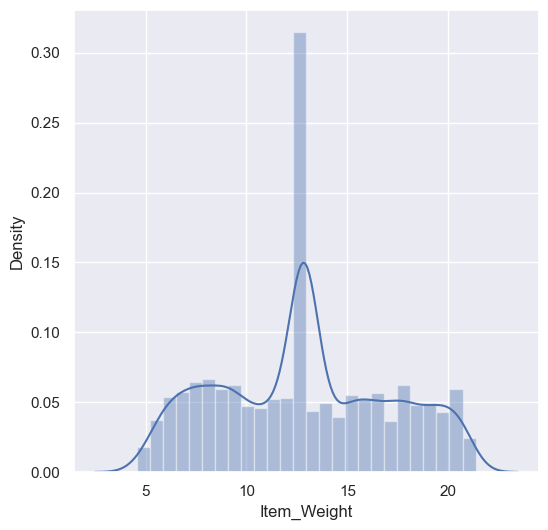

In [23]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


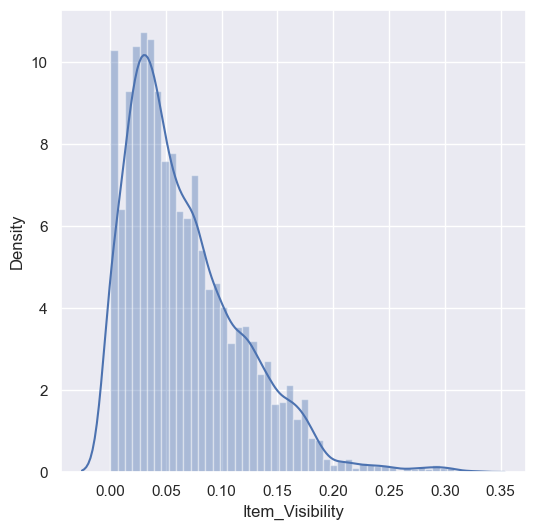

In [24]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


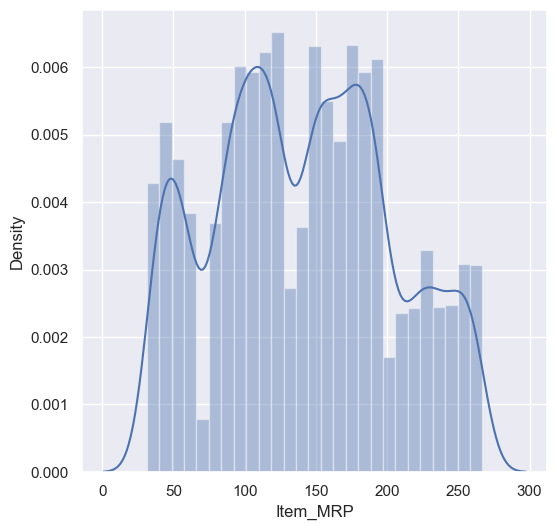

In [25]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


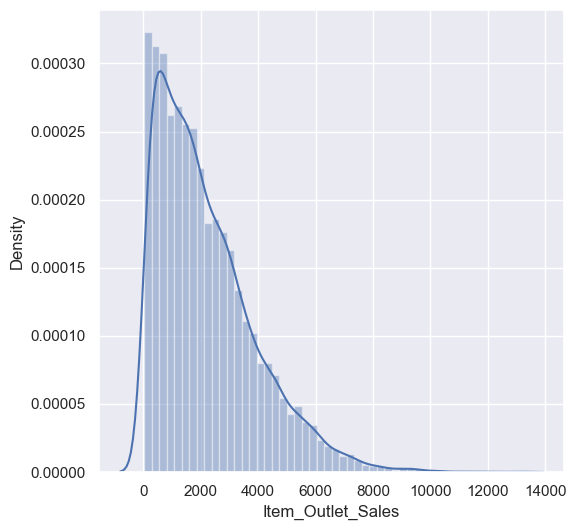

In [26]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

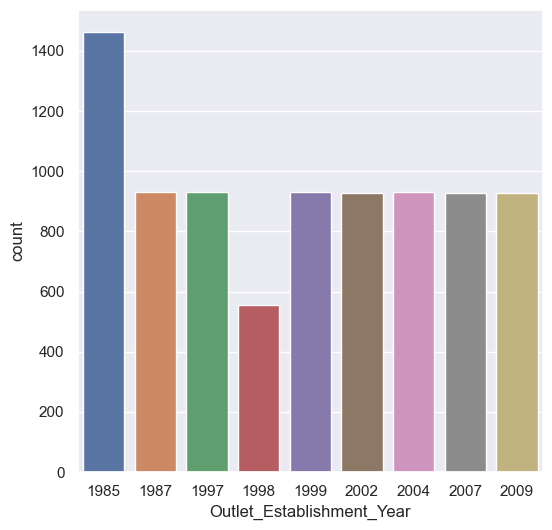

In [27]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=big_mart_data)
plt.show()

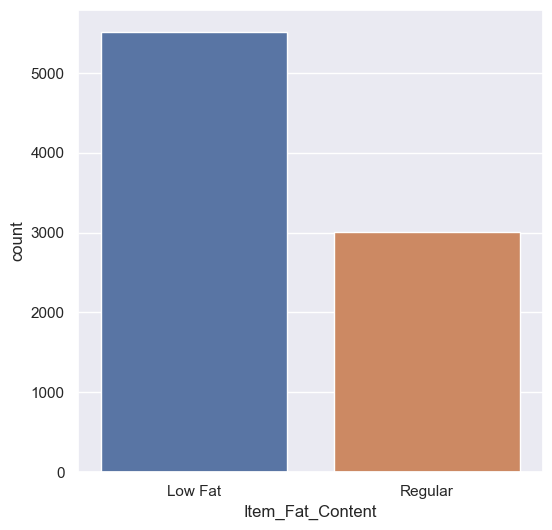

In [28]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=big_mart_data)
plt.show()

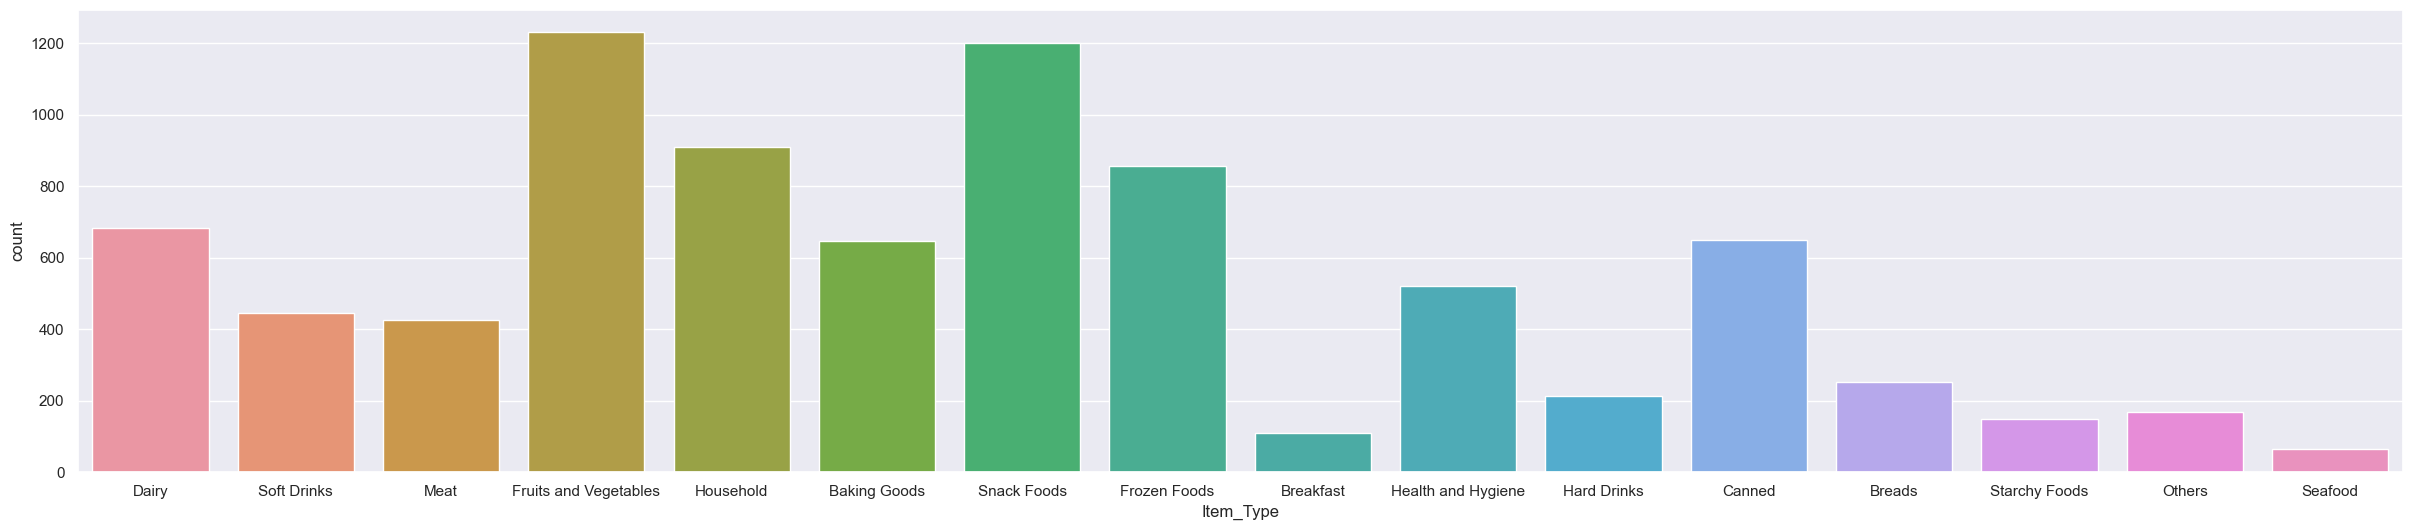

In [29]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=big_mart_data)
plt.show()

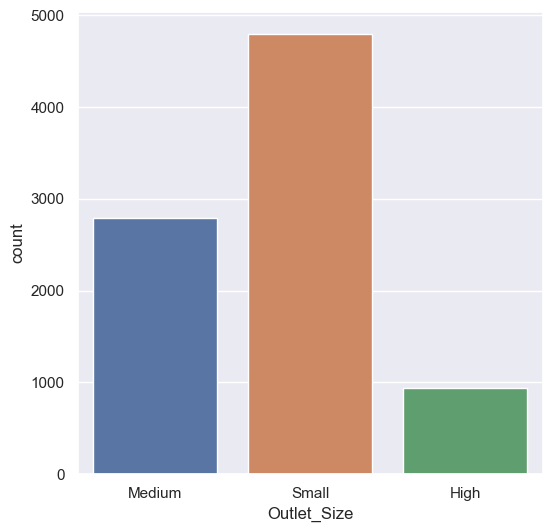

In [30]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=big_mart_data)
plt.show()

In [31]:
# Label Encoding
encoder = LabelEncoder()

In [32]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])

big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [33]:
test_data['Item_Identifier'] = encoder.fit_transform(test_data['Item_Identifier'])

test_data['Item_Fat_Content'] = encoder.fit_transform(test_data['Item_Fat_Content'])

test_data['Item_Type'] = encoder.fit_transform(test_data['Item_Type'])

test_data['Outlet_Identifier'] = encoder.fit_transform(test_data['Outlet_Identifier'])

test_data['Outlet_Size'] = encoder.fit_transform(test_data['Outlet_Size'])

test_data['Outlet_Location_Type'] = encoder.fit_transform(test_data['Outlet_Location_Type'])

test_data['Outlet_Type'] = encoder.fit_transform(test_data['Outlet_Type'])

In [34]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [35]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,4,0.038428,4,87.3198,2,2007,3,1,1
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,3,2,0
3,809,7.315000,1,0.015388,13,155.0340,2,2007,3,1,1
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3


In [36]:
# Splitting features and Target
X = big_mart_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = big_mart_data['Item_Outlet_Sales']
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [37]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [39]:
features=['Item_Identifier','Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [40]:
X_test2 = test_data[features]

In [41]:
print(X_test2)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                1103    20.750000                 1         0.007565   
1                1067     8.300000                 4         0.038428   
2                1406    14.600000                 1         0.099575   
3                 809     7.315000                 1         0.015388   
4                1184    12.695633                 2         0.118599   
...               ...          ...               ...              ...   
5676              231    10.500000                 2         0.013496   
5677              306     7.600000                 2         0.142991   
5678             1412    10.000000                 1         0.073529   
5679              517    15.300000                 2         0.000000   
5680              987     9.500000                 2         0.104720   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0            13  107.8622                  9    

In [42]:
print(big_mart_data.shape, X_train.shape, X_test.shape)

(8523, 12) (6818, 11) (1705, 11)


In [43]:
# Linear Regression
lr=LinearRegression()

In [44]:
lr.fit(X_train, Y_train)

LinearRegression()

In [45]:
# prediction on training data
training_data_p = lr.predict(X_train)

In [46]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_p)
print('R Squared value = ', r2_train)

R Squared value =  0.5071929167339231


In [47]:
# prediction on test data
test_data_p = lr.predict(X_test)

In [48]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_p)
print('R Squared value = ', r2_test)

R Squared value =  0.48912987193626356


In [49]:
# XGBoost Regressor
regressor = XGBRegressor()

In [50]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [51]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [52]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [53]:
print('R Squared value = ', r2_train)

R Squared value =  0.8639680373364909


In [54]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [55]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [56]:
print('R Squared value = ', r2_test)

R Squared value =  0.5233136709735687


In [57]:
# RandomForestRegressor
rf = RandomForestRegressor()

In [58]:
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [59]:
# prediction on training data
training_data = rf.predict(X_train)

In [60]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data)
print('R Squared value = ', r2_train)

R Squared value =  0.9380292858378985


In [61]:
# prediction on test data
test_data = rf.predict(X_test)

In [62]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data)
print('R Squared value = ', r2_test)

R Squared value =  0.5534124522239512


In [63]:
# Perdict the sales for test.csv file using XGBoost Regressor
# prediction on test.csv data

prediction = regressor.predict(X_test2)
X_test2['Item_Outlet_Sales']=prediction

In [64]:
print(X_test2.head())

   Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0             1103    20.750000                 1         0.007565         13   
1             1067     8.300000                 4         0.038428          4   
2             1406    14.600000                 1         0.099575         11   
3              809     7.315000                 1         0.015388         13   
4             1184    12.695633                 2         0.118599          4   

   Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  107.8622                  9                       1999            1   
1   87.3198                  2                       2007            3   
2  241.7538                  0                       1998            3   
3  155.0340                  2                       2007            3   
4  234.2300                  5                       1985            1   

   Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
0         